# **Normalizzazione dei Nomi Aziendali**

## **Introduzione**

Nel processo di deduplicazione e record linkage, è essenziale normalizzare i nomi aziendali per evitare variazioni dovute a abbreviazioni, formati o errori di battitura. In questa fase, implementiamo una strategia per rendere i nomi uniformi e comparabili.

---

## **Step 1: Importazione delle Librerie e del DataFrame**

In [4]:
import re
import pandas as pd
import unidecode

AZIENDE_CSV = '../aziende.csv'
IMPIEGATI_CSV = '../impiegati.csv'
companies_df = pd.read_csv(AZIENDE_CSV)

/tmp/ipykernel_129458/3147525914.py:7: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  companies_df = pd.read_csv(AZIENDE_CSV)


---

## **Step 2: Definizione della Mappa di Sostituzione**
Utilizziamo un dizionario per standardizzare suffissi comuni nei nomi aziendali.
### **Questo va sicuramente migliorato magari passando tutta la prima colonna a chat**

In [2]:
REPLACEMENTS = {
    r"&": "",
    r"(?<=\s|,|\.)inc\.?\b": "",
    r"(?<=\s|,|\.)ltd\b": "",
    r"(?<=\s|,|\.)llc\b": "",
    r"(?<=\s|,|\.)plc\b": "",
    r"(?<=\s|,|\.)co\.?\b": "",  # Handles "co." and "co,"
    r"(?<=\s|,|\.)corp\.?\b": "",
    r"(?<=\s|,|\.)srl\b": "",
    r"(?<=\s|,|\.)spa\b": "",
    r"(?<=\s|,|\.)ag\b": "",
    r"(?<=\s|,|\.)sa\b": "",
    r"(?<=\s|,|\.)ab\b": "",
    r"(?<=\s|,|\.)ou\b": "",
    r"(?<=\s|,|\.)as\b": "",
    r"(?<=\s|,|\.)nv\b": "",
    r"(?<=\s|,|\.)gmbh\b": "",
    r"(?<=\s|,|\.)holding\b": "",
    r"(?<=\s|,|\.)holdings\b": "",
    r"(?<=\s|,|\.)corporation\b": "",
    r"(?<=\s|,|\.)industries\b": "",
    r"(?<=\s|,|\.)company limited\b": "",
    r"(?<=\s|,|\.)technology\b": "",
    r"(?<=\s|,|\.)solutions\b": "",
    r"(?<=\s|,|\.)systems\b": "",
    r"(?<=\s|,|\.)services\b": "",
    r"(?<=\s|,|\.)public company\b": "",
    r"(?<=\s|,|\.)limited\b": "",
    r"(?<=\s|,|\.)group\b": "",
    r"(?<=\s|,|\.)company\b": "",

    # New patterns to remove dotted abbreviations
    r"(?<=\s|,|\.)s\.?p\.?a\.?\b": "",  # Handles "S.p.A." and variations
    r"(?<=\s|,|\.)s\.?r\.?l\.?\b": "",  # Handles "S.R.L."
    r"(?<=\s|,|\.)s\.?a\.?\b": "",      # Handles "S.A."
    r"(?<=\s|,|\.)n\.?v\.?\b": ""       # Handles "N.V."
}

---

## **Step 3: Funzione di Normalizzazione**

Questa funzione applica una serie di trasformazioni per ottenere nomi uniformi:

- Conversione in minuscolo
- Rimozione di accenti
- Eliminazione di caratteri speciali
- Sostituzione dei suffissi tramite `REPLACEMENTS`

In [3]:
def normalize_name(name):
    """Normalizza i nomi delle aziende."""
    if pd.isna(name) or not isinstance(name, str):
        return ""
    
    # 1. Rimuove accenti e caratteri speciali
    name = unidecode.unidecode(name)
    
    # 2. Minuscolo e rimozione spazi extra
    name = name.lower().strip()
    
    # 3. Rimuove testo tra virgolette
    name = re.sub(r'"([^"]+)"','', name) # 3. Rimuove testo tra virgolette
    
    # 4. Applica le sostituzioni dalla mappa REPLACEMENTS
    for pattern, replacement in REPLACEMENTS.items():
        name = re.sub(pattern, replacement, name)
    
    # 5. Pulisce caratteri inutili
    name = re.sub(r"\s*,+\s*", " ", name)
    name = re.sub(r"(?<!\w)\.+(?!\w)", " ", name)
    
    # 6. Sostituisce spazi multipli con uno solo
    name = re.sub(r'\s+', ' ', name)  
    
    # 7. Eliminare punteggiatura indesiderata alla fine 
    name = re.sub(r"[.,\-]+$", "", name)
    
    return name.strip()

---

## **Step 4: Applicazione alla Colonna 'company_name'**

Eseguiamo la normalizzazione sulla colonna contenente i nomi aziendali.

In [4]:
companies_df['normalized_name'] = companies_df['company_name'].apply(normalize_name)
companies_df['modified'] = companies_df['normalized_name'] != companies_df['company_name']

---

## **Step 5: Visualizzazione e salvataggio del Risultato**

Mostriamo i primi risultati per verificare la trasformazione
e salva tutto in un csv

In [5]:
num_modified = companies_df['modified'].sum()
total_entries = len(companies_df)
percentage_modified = (num_modified / total_entries) * 100

print(f"Entries modificate: {num_modified} su {total_entries} ({percentage_modified:.2f}%)")

modified_entries = companies_df[companies_df['modified']][['company_name', 'normalized_name']]
display(modified_entries.sample(25))

companies_df = companies_df.sort_values(by=['normalized_name'])
companies_df[['company_name', 'normalized_name', 'modified']].to_csv('normalized_names.csv', index=False)

Entries modificate: 44141 su 76808 (57.47%)


,company_name,normalized_name
1921,aiandusã¼histuaespaloodus(80107752),aiandusa 1/4histuaespaloodus(80107752)
68180,tristan capital partners asset management limited,tristan capital partners asset management
34160,itn nanovation ag,itn nanovation
16754,cresco medical finances ltd,cresco medical finances
44316,ndp automotive ltd,ndp automotive
17447,dai-ichi life holdings,dai-ichi life
42433,mitchells & butlers plc,mitchells butlers
64098,t & b builders (holdings) limited,t b builders (holdings)
23416,financiere de l'odet sa,financiere de l'odet
55059,rhi magnesita nv,rhi magnesita


---

# **Normalizzazione dei paesi**

In [6]:
filtered_df = companies_df[companies_df['country'].notna() & (companies_df['country'].str.strip() != "")].copy()
display(filtered_df[['company_name', 'country']].sample(25))

,company_name,country
47141,omv group,austria
73369,winpak,canada
58032,sensirion holding ag,switzerland
67107,tkd science and technology,china
75097,zbom home collection,china
26024,generator hostel rome srl,italy
29579,hbis resources,china
55402,roche holding,switzerland
75262,zhejiang daily digital culture group,china
57428,schaeffler india,india


In [7]:
iva_country_df = filtered_df[filtered_df['country'].astype(str).str.contains(r"\d", na=False)].copy()
display(iva_country_df[['company_name', 'country']])

,company_name,country
79,2i rete gas spa,it06724610966
85,2v energy srl,it03795470248
294,a. menarini industrie farmaceutiche riunite srl,it00395270481
303,a.i.a. agricola italiana alimentare spa,it00233470236
319,a.r.g.o. spa,it01327400352
...,...,...
75075,zanetti spa,it00373690163
75193,zeor finanziaria spa,it05678591008
75502,zignago holding spa,it03781170281
75659,zucchetti group spa,it04171890157


## **Step 1: Eliminazione delle partite IVA dai paesi**

Le partite iva sono codici da 11 cifre e possono essere precedute da due lettere iniziali rappresentanti il paese (e.g. "it") 

In [8]:
def remove_piva_from_country(country):
    if pd.isna(country) or not isinstance(country, str):
        return country
    vat_regex = r"(?:IT|it)?\d{11}"
    if re.fullmatch(vat_regex, country):
        return "italy"
    return country

---

## **Step 2: Traduzione dei nomi dei paesi in inglese**

Eliminazione di caratteri particolari come parentesi e virgolette dal campo country

In [9]:
def clean_country(country): 
    if pd.isna(country) or not isinstance(country, str):
        return ""
    
    # Rimuove parentesi tonde ( ), quadre [ ] e singole virgolette '
    country = re.sub(r"[\[\]']", "", country)  
    country = re.sub(r"\s*\(.*?\)\s*", "", country).strip()  
        
    return country

In [10]:
import pycountry

country_mapping = {
    'it': 'italy',            # Codici e abbreviazioni per l'Italia
    'uk': 'united kingdom',   # Abbreviazione per il Regno Unito
    'usa': 'united states',   # Abbreviazione per gli Stati Uniti
    'us': 'united states',    # Abbreviazione per gli Stati Uniti (altro formato)
    'fr': 'france',           # Abbreviazione per la Francia
    'de': 'germany',          # Abbreviazione per la Germania
    'es': 'spain',            # Abbreviazione per la Spagna
    'ca': 'canada',           # Abbreviazione per il Canada
    'au': 'australia',        # Abbreviazione per l'Australia
    'cn': 'china',            # Abbreviazione per la Cina
    'in': 'india',            # Abbreviazione per l'India
    'jp': 'japan',            # Abbreviazione per il Giappone
    'br': 'brazil',           # Abbreviazione per il Brasile
    'kr': 'south korea',      # Abbreviazione per la Corea del Sud
    'mx': 'mexico',           # Abbreviazione per il Messico
    'se': 'sweden',           # Abbreviazione per la Svezia
    'no': 'norway',           # Abbreviazione per la Norvegia
    'fi': 'finland',          # Abbreviazione per la Finlandia
    'nl': 'netherlands',      # Abbreviazione per i Paesi Bassi
    'ch': 'switzerland',      # Abbreviazione per la Svizzera
    'ru': 'russia',           # Abbreviazione per la Russia
    'sa': 'south africa',     # Abbreviazione per il Sudafrica
    'kr': 'south korea',      # Abbreviazione per la Corea del Sud
    'sg': 'singapore',        # Abbreviazione per Singapore
    "uae": "united Arab Emirates",
}

In [11]:
def translate_country(country):
    if pd.isna(country) or not isinstance(country, str) or country.strip() == "":
        return ""
    
    if country in country_mapping:
        return country_mapping[country]
    
    try:
        country_obj = pycountry.countries.lookup(country)
        return country_obj.name
    except LookupError:
        return country

In [12]:
def normalize_country(country):
    if pd.isna(country) or not isinstance(country, str) or country.strip() == "":
        return ""
    
    # Se ci sono più paesi separati da virgole, li normalizziamo singolarmente
    country_list = [c.lower().strip() for c in country.split(",")]

    normalized_countries = []
    for c in country_list:
        c = clean_country(c)
        c = remove_piva_from_country(c)
        c = translate_country(c)
        normalized_countries.append(c.lower().strip())
    
    return ", ".join(normalized_countries)

In [13]:
companies_df['normalized_country'] = companies_df['country'].apply(normalize_country)
companies_df['modified'] = companies_df['normalized_country'] != companies_df['country']

In [14]:
# Exclude NaN to "" modifications
valid_modifications = companies_df[
    (companies_df["modified"]) & ~(companies_df["country"].isna() & (companies_df["normalized_country"] == ""))
]

num_modified = len(valid_modifications)
total_entries = len(companies_df)
percentage_modified = (num_modified / total_entries) * 100

print(f"Entries modificate: {num_modified} su {total_entries} ({percentage_modified:.2f}%)")

modified_entries = valid_modifications[['country', 'normalized_country']]
display(modified_entries.sample(25))

companies_df = companies_df.sort_values(by=['normalized_country'])
companies_df[['country', 'normalized_country', 'modified']].to_csv('normalized_country.csv', index=False)

Entries modificate: 8258 su 76808 (10.75%)


,country,normalized_country
46127,usa,united states
6872,it01390230462,italy
33064,usa,united states
50810,usa,united states
72604,usa,united states
18831,usa,united states
34390,usa,united states
13546,usa,united states
43609,usa,united states
6663,usa,united states


# **Normalizzazione delle città**

In [15]:
filtered_df = companies_df[companies_df['city'].notna() & (companies_df['city'].str.strip() != "")].copy()
display(filtered_df[['company_name', 'city']].sample(25))

,company_name,city
19984,"eatelcorp, l.l.c.",gonzales
6158,attentive,hoboken
24008,"fm holdco, llc",wilmington
61245,sonesta international hotels corporation,newton
72982,west burton property limited,london
48793,palantir technologies inc.,denver
29556,haydon,shanghai
69768,"university of wisconsin-stevens point, foundat...",stevens point
15498,collistar spa,milano
59377,sidel spa,parma


### **Step 1: Eliminare eventuale testo tra parentesi** 
La cosa che sempra più intuitiva da fare è eliminare eventuale testo tra parentesi dopo la città (perdendo un po' di informazione, ma comunque accettabile)

In [69]:
def clean_city(city):
    if pd.isna(city) or not isinstance(city, str):
        return ""
    
    city = re.sub(r"\s*\(.*?\)\s*", "", city).strip()
    return city 

### **Step 2: Tradurre nomi di città italiane in italiano** 

Bisognerebbe anche indagare se qualche città viene riportata in lingue diverse...

In [17]:
# Query in italiano
milano_df = filtered_df[filtered_df["city"] == "milano"]
roma_df = filtered_df[filtered_df["city"] == "roma"]

# Query in inglese
milan_df = filtered_df[filtered_df["city"] == "milan"]
rome_df = filtered_df[filtered_df["city"] == "rome"]

In [18]:
display(milano_df[['company_name', 'city']])
display(milan_df[['company_name', 'city']])

,company_name,city
4619,apeiron societa' benefit spa,milano
9202,belenergia spa,milano
9203,belenergia spa,milano
9200,belenergia mezz finance srl,milano
9201,belenergia mezz finance srl,milano
...,...,...
11664,c.w.f. children worldwide fashion italia srl,milano
15446,colas rail italia spa,milano
55608,rothschild & c. italia spa,milano
19537,dual italia spa,milano


,company_name,city
57140,satispay,milan
57364,scalapay,milan


In [19]:
display(roma_df[['company_name', 'city']])
display(rome_df[['company_name', 'city']])

,company_name,city
2463,ald automotive italia srl,roma
4282,angelini pharma italia aziende chimiche riunit...,roma
9423,bester new energy italia srl,roma
10529,bombardier transportation italy spa,roma
69748,universita' degli studi roma tre,roma
...,...,...
17626,daniela y srl,roma
43417,mts spa,roma
26231,gestore dei servizi energetici - gse spa,roma
26226,gestione concessioni spa,roma


,company_name,city


Probabilmente, visto la sorgente dati, le aziende italiane sono state estratte da repository italiani o almeno convertite con città in italiano. Solo due aziende (*satispay* e *scalapay*) hanno il nome riportato in inglese.

Le città italiane sono segnate maggiormente in italiano possiamo pensare di **convertire le città con nome inglese in italiano** 

Abbiamo bisogno di un dizionario che mappi i nomi delle città (City-mapping). Evitiamo di scriverlo da zero e ne usiamo uno noto da qualche libreria (*do not reinvent the wheel...*).

Usiamo dunque la libreria `geopy` che con **GeoNames**, un database globale di località, ci permette di convertire i nomi 

In [70]:
from geopy.geocoders import Nominatim
import time
from tqdm import tqdm
import pickle

CITY_CACHE_FILE = "geopy_city_cache.pkl"
tqdm.pandas()
geolocator = Nominatim(user_agent="city_normalizer")

try:
    with open(CITY_CACHE_FILE, 'rb') as f:
        city_cache = pickle.load(f)
    print("Found saved cache...")
except FileNotFoundError:
    city_cache = {}
    print("Cache file not found, creating a new one...")

cache_hit = 0
cache_miss = 0

Found saved cache...


In [71]:
def normalize_city(city):
    global cache_hit, cache_miss
    city = clean_city(city)

    if city in city_cache:
        cache_hit += 1
        return city_cache[city]
    
    cache_miss += 1
    
    try:
        time.sleep(0.5)
        location = geolocator.geocode(city, exactly_one=True, timeout=10)
        if location and "Italia" in location.address:
            location_it = geolocator.geocode(city, language="it", timeout=10)
            if location_it:
                it_city = location_it.raw.get("display_name", city).split(",")[0].lower().strip()
                city_cache[city] = it_city
                return it_city
    except Exception as e:
        print(f"Errore con {city}: {e}")

    city_cache[city] = city
    return city

In [22]:
def tqdm_wrapper(row, tqdm_bar):
    if pd.isna(row['city']) or not isinstance(row['city'], str) or row['city'] == "":
        tqdm_bar.update(1)
        return ""    
    
    global cache_miss, cache_hit
    normalized = normalize_city(row['city']) if row['country'] == "italy" else row['city']
    total_req = cache_hit + cache_miss
    hit_ratio = (cache_hit / total_req) * 100 if total_req > 0 else 0
    tqdm_bar.set_description(f"Processing | Cache Hit Ratio: {hit_ratio:.2f}%")  # Update bar without new lines
    tqdm_bar.update(1)

    return normalized

**GeoNames** funziona, adesso applichiamolo all'intero dataframe

In [23]:
with tqdm(total=len(companies_df), desc="Processing", unit="entry") as tqdm_bar:
        companies_df['city_translate'] = companies_df.apply(lambda row: tqdm_wrapper(row, tqdm_bar), axis=1)

with open(CITY_CACHE_FILE, 'wb') as f:
        pickle.dump(city_cache, f)
        
companies_df['modified'] = companies_df['city'] != companies_df['city_translate']

Processing | Cache Hit Ratio: 100.00%: 100%|██████████| 76808/76808 [00:06<00:00, 12245.62entry/s]


In [24]:
valid_modifications = companies_df[
    (companies_df["modified"]) & ~(companies_df["city"].isna() & (companies_df["city_translate"] == ""))
]

num_modified = len(valid_modifications)
total_cities = len(companies_df)
percentage_modified = (num_modified / total_cities) * 100

print(f"Città tradotte: {num_modified} su {total_cities} ({percentage_modified:.2f}%)")

translated_cities = valid_modifications[['normalized_name', 'city', 'city_translate']]
display(translated_cities.sample(25))

companies_df = companies_df.sort_values(by=['city'])
companies_df[['normalized_name', 'city', 'city_translate']].to_csv('translated_cities.csv', index=False)

Città tradotte: 170 su 76808 (0.22%)


,normalized_name,city,city_translate
37765,lactalis ingredients italia,torrile (san polo ),torrile
20865,emea,ventimiglia (latte ),ventimiglia
42089,microsoft,"milano (microsoft house , microsoft house )",milano
19419,drillmec,podenzano (gariga ),podenzano
42037,microbial control italy,segrate (segreen business park pal. y ),segrate
4497,antica farmaceutica lucchese,lucca (san vito ),lucca
2578,ali,cernusco sul naviglio (villa fiorita ),cernusco sul naviglio
19420,drillmec,podenzano (gariga ),podenzano
3489,althea,rodano (millepini ),rodano
38347,lenovo italy,"segrate (san felice, ed.e c/o segreen business...",segrate


-- dedurre country da city

In [64]:
df = pd.read_csv('../aziende_normalizzate.csv')

filtered_df = df[df['city'].isna() & df['country'].isna() & df['headquarters'].notna()]
display(f"ci sono {filtered_df.shape[0]} righe con city e country nullo ma headquartes non nullo")

'ci sono 34186 righe con city e country nullo ma headquartes non nullo'

---

Step intermedio, dedurre city e country da headquarters

In [65]:
df = pd.read_csv('../aziende_normalizzate.csv')

display(df['headquarters'].dropna().sample(20))

45193                   ahmedabad, gujarat, india
5617                                     budapest
4070                coimbatore, tamil nadu, india
43132                            toyohashi, japan
41245                    united states of america
36880                                noida, india
26656          dallas, texas, united states (usa)
35187                           bangkok, thailand
18790                                tokyo, japan
18145                                 pune, india
7782                         jeddah, saudi arabia
6502     cambridge,cambridgeshire, united kingdom
29718                         düsseldorf, germany
8374                                       canada
5774                           courbevoie, france
56637                                      france
60412                                tokyo, japan
250                       aix-en-provence, france
40399                                      leuven
58632                        singapore, singapore


In [66]:
def infer_city_country(row):
    if pd.notna(row['headquarters']) and pd.isna(row['city']) and pd.isna(row['country']):

        parts = [p.strip() for p in row['headquarters'].split(',')]

        if len(parts) == 1:     #only country is provided
            city, country = None, parts[0]
        elif len(parts) == 2:    # city and country
            city, country = parts[0], parts[1]
        else:                   # more than two parts, assume (City, Region, Country)
            city, country = parts[0], parts[-1]
        
        return pd.Series([city, country, True])
    return pd.Series([row['city'], row['country'], False])


In [ ]:
df[['city', 'country', 'modified']] = df.apply(infer_city_country, axis=1)

In [76]:
modified_rows = df[df['modified'] == True]
display(modified_rows[['company_name', 'city', 'country']].sample(20))

,company_name,city,country
68409,unionbank of the philippines,None,philippines
72939,yggdrazil,bangkok,thailand
45845,nsc groupe,guebwiller,france
63868,talentedge,mumbai,india
30117,hindustan zinc,udaipur,india
57901,shanghai phichem material,shanghai,china
12950,cenveo publisher,richmond,united states (usa)
62216,stup consultants,mumbai,india
25826,genetic technologies,fitzroy,australia
29219,hateks hatay tekstil isletmeleri a.s,hatay,turkey


---

### **Salvataggio delle modifiche sul csv**

In [26]:
companies_df['country'] = companies_df['normalized_country']
companies_df['company_name'] = companies_df['normalized_name']
companies_df['city'] = companies_df['city_translate']

companies_df.drop(columns=['normalized_name', 'normalized_country', 'city_translate', 'modified'], inplace=True)
companies_df = companies_df.sort_values(by=['company_name'])
companies_df.drop_duplicates(inplace=True)                          # drop duplicates
companies_df.to_csv('../aziende_normalizzate.csv', index=False)

In [ ]:
df1 = pd.read_csv('../ground_truth.csv')
df1.drop(columns=[
    'c2.sic_code', 'c2.emtak_code', 'c2.continent', 'c2.headquarters','c2.nace_code', 'c2.facebook', 'c2.twitter', 'c2.pinterest', 'c2.instagram', 'c2.investors', 'c2.region',
    'c1.sic_code', 'c1.emtak_code', 'c1.continent', 'c1.headquarters','c1.nace_code', 'c1.facebook', 'c1.twitter', 'c1.pinterest', 'c1.instagram', 'c1.investors', 'c1.region',

                  ],inplace=True)
df1.to_csv('../ground_truth.csv', index=False)

Index(['c1.company_id', 'c1.company_name', 'c1.trade_name', 'c1.industry',
       'c1.sector', 'c1.categories', 'c1.company_status', 'c1.company_type',
       'c1.headquarters', 'c1.address', 'c1.postal_code', 'c1.city',
       'c1.country', 'c1.state', 'c1.continent', 'c1.foundation_year',
       'c1.registration_date', 'c1.website', 'c1.rank',
       'c1.market_cap_or_valuation', 'c1.number_of_employees', 'c1.ceo',
       'c1.founder', 'c1.assets', 'c1.profit_or_net_income', 'c1.revenue',
       'c1.total_funding_raised', 'c1.share_price', 'c1.change_1_day',
       'c1.change_1_year', 'c1.debts', 'c1.phone', 'c1.sic_code',
       'c1.emtak_code', 'c1.nace_code', 'c1.facebook', 'c1.twitter',
       'c1.pinterest', 'c1.instagram', 'c1.investors', 'c1.region',
       'c1.notes_or_description', 'c2.company_id', 'c2.company_name',
       'c2.trade_name', 'c2.industry', 'c2.sector', 'c2.categories',
       'c2.company_status', 'c2.company_type', 'c2.headquarters', 'c2.address',
       'c2.

/tmp/ipykernel_163393/3775613106.py:6: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../aziende.csv')


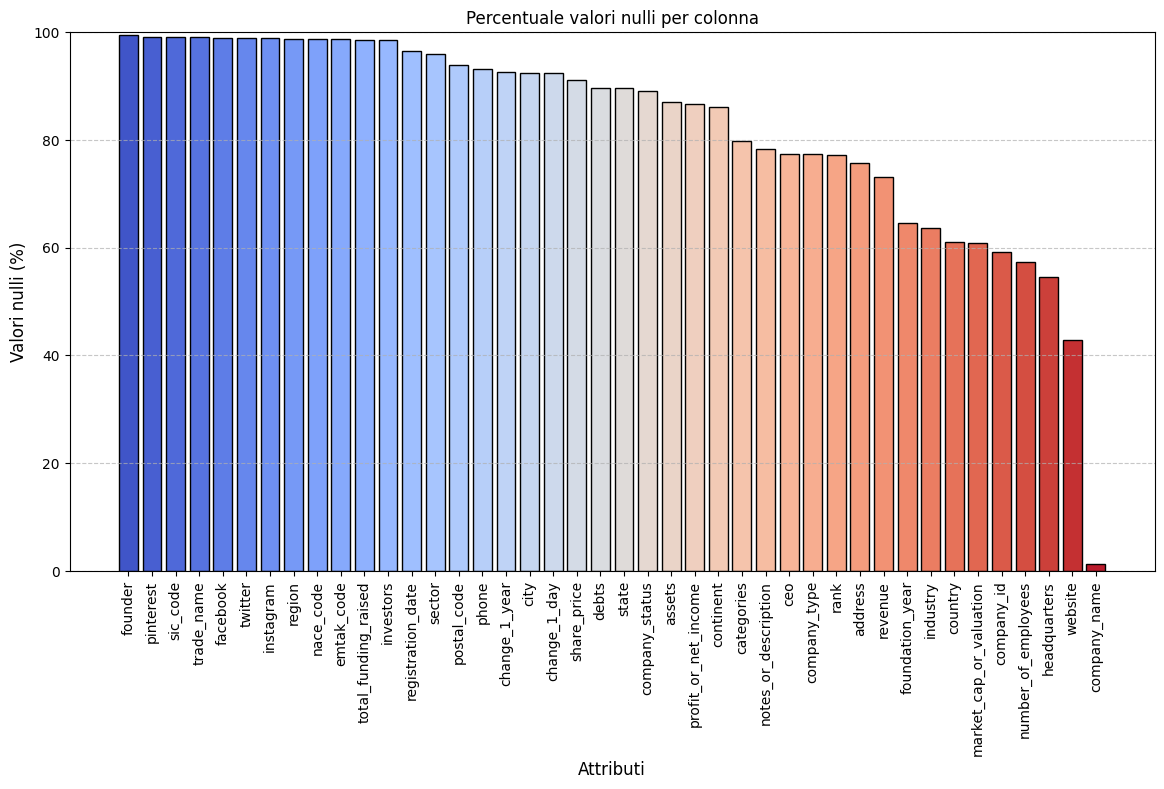

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Per una migliore gestione dei colori

# Carica il file CSV in un DataFrame
df = pd.read_csv('../aziende.csv')

# Calcola la percentuale di valori nulli per ogni colonna
null_percentages = (df.isnull().mean() * 100).round(2)

# Ordina le colonne per percentuale di valori nulli (opzionale, migliora la leggibilità)
null_percentages = null_percentages.sort_values(ascending=False)

# Crea una palette cromatica con gradazione
colors = sns.color_palette("coolwarm", len(null_percentages))

# Crea il grafico
plt.figure(figsize=(14, 7))
plt.bar(null_percentages.index, null_percentages, color=colors, edgecolor='black')

# Aggiungi titoli ed etichette
plt.xlabel('Attributi', fontsize=12)
plt.ylabel('Valori nulli (%)', fontsize=12)
plt.xticks(rotation=90)  # Ruota i nomi delle colonne per una migliore leggibilità
plt.ylim(0, 100)  # Imposta il limite massimo al 100%
plt.yticks(fontsize=10)  # Migliora la leggibilità delle etichette Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Percentuale valori nulli per colonna")

# Mostra il grafico
plt.savefig('../figures/null_count.png')
plt.show()

In [5]:
import pandas as pd
df = pd.read_csv('../ground_truth.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.to_csv('../ground_truth.csv', index=False)